# Michael EDA

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

from scripts import project_functions
csv = "Electric_Vehicle_Population_Data.csv"
df = project_functions.load_and_process(csv)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df.head()

,VIN,County,City,ZIP,Model_Year,Make,Model,EV_Type,Range,MSRP,Location,Latitude,Longitude,North_South,West_East
0,JA4J24A5XJ,King,KENT,98032,2018,MITSUBISHI,OUTLANDER,PHEV,22,34595,POINT (-122.26132099999998 47.390601),47.390601,-122.261321,North,West
1,JN1AZ0CP7B,King,COVINGTON,98042,2011,NISSAN,LEAF,BEV,73,32780,POINT (-122.11667400000002 47.363112),47.363112,-122.116674,North,West
2,1G1FW6S07H,Clark,CAMAS,98607,2017,CHEVROLET,BOLT,BEV,238,37495,POINT (-122.40849800000001 45.620943),45.620943,-122.408498,South,West
3,1N4AZ0CP6D,King,SEATTLE,98117,2013,NISSAN,LEAF,BEV,75,28800,POINT (-122.379354 47.687571),47.687571,-122.379354,North,West
4,JN1AZ0CP1B,Clark,CAMAS,98607,2011,NISSAN,LEAF,BEV,73,32780,POINT (-122.40849800000001 45.620943),45.620943,-122.408498,South,West


## Basic Analysis

In [3]:
df.nunique(axis=0)

VIN            4070
County           67
City            435
ZIP             541
Model_Year       19
Make             30
Model           101
EV_Type           2
Range            91
MSRP            148
Location        540
Latitude        540
Longitude       539
North_South       2
West_East         2
dtype: int64

<AxesSubplot:>

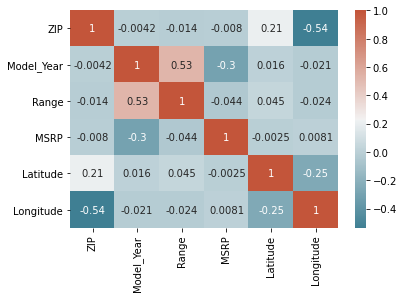

In [4]:
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

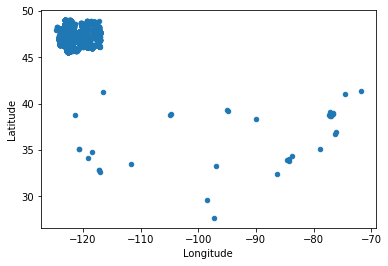

In [5]:
df.plot(kind='scatter', x='Longitude', y='Latitude')

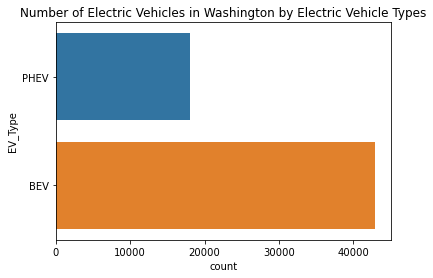

In [6]:
ax = sns.countplot(y = df["EV_Type"], data = df).set_title("Number of Electric Vehicles in Washington by Electric Vehicle Types")

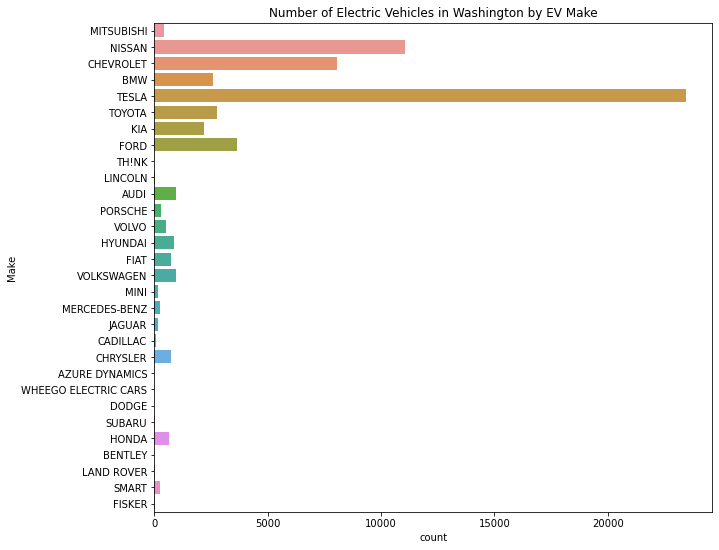

In [7]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 9)
ax1 = sns.countplot(y = df["Make"], data = df).set_title("Number of Electric Vehicles in Washington by EV Make")

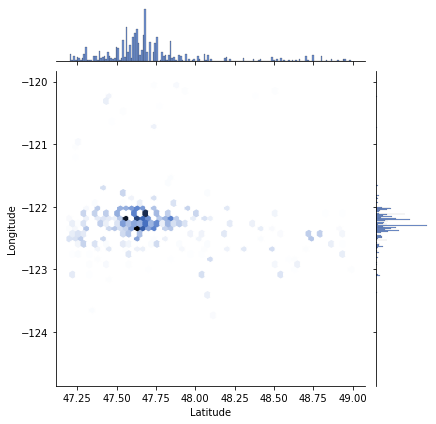

In [8]:
df1 = df[(df['Latitude'] > 47.2) & (df['Longitude'] < -120)]
sns.jointplot(x="Latitude", y="Longitude", kind="hex", data=df1, color="#4571c5")

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

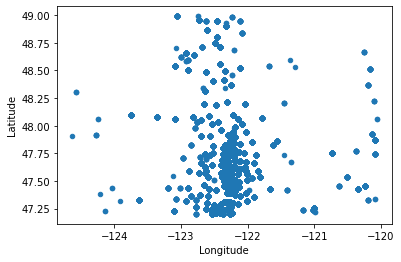

In [9]:
df1.plot(kind='scatter', x='Longitude', y='Latitude')

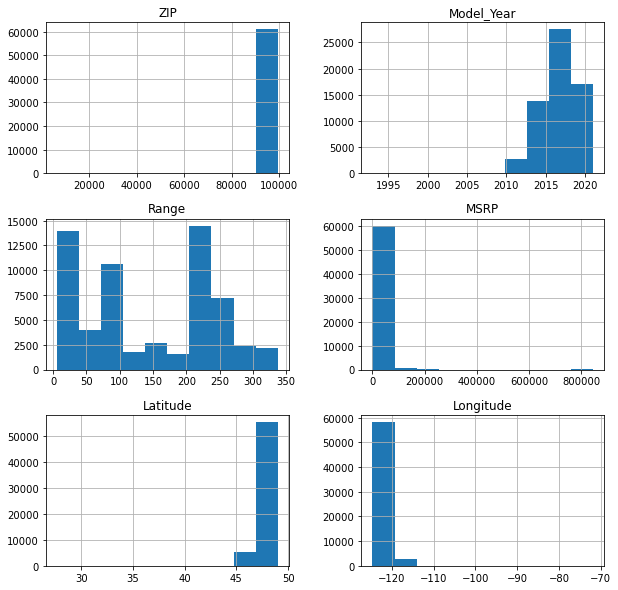

In [10]:
hist = df.hist(bins=10,figsize =(10,10))

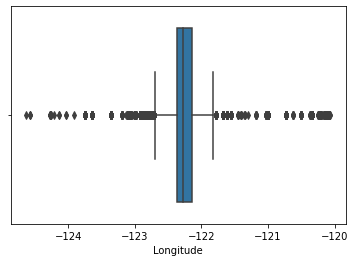

In [11]:
boxplot = sns.boxplot(x = df1['Longitude'])

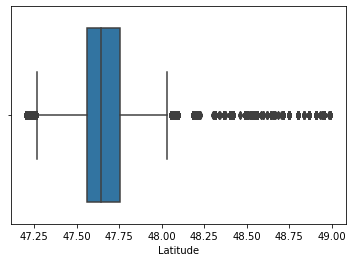

In [12]:
boxplot1 = sns.boxplot(x = df1['Latitude'])

## Research Question Analysis

#### Research Question #1

**What are the top 10 most used vehicles used in Washington in the most densely populated area (North-west)?**

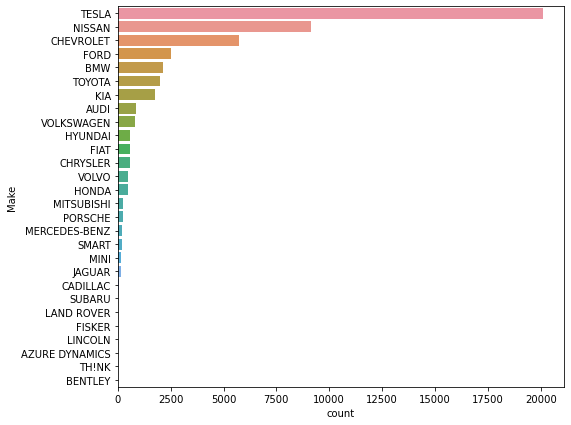

In [13]:
df2 = df.drop(df[(df['North_South']=='South')].index)
df2 = df2.drop(df2[(df2['North_South']=='North')&(df2['West_East']=='East')].index)

fig, ax2 = plt.subplots()
fig.set_size_inches(8, 7)
ax2 = sns.countplot(y = 'Make',data = df2,order = df2['Make'].value_counts().index)

From the above graph the top 10 most used vehicles used in Washington in the most densely populated area are:
1. Tesla
2. Nissan
3. Chevrolet
4. Ford
5. BMW
6. Toyota
7. Kia
8. Audi
9. Volkswagen
10. Hyundai

#### Research Question #2
**What are the top 10 most used vehicles used in Washington in the least densely populated areas (North-east, South-east, South-west)?**

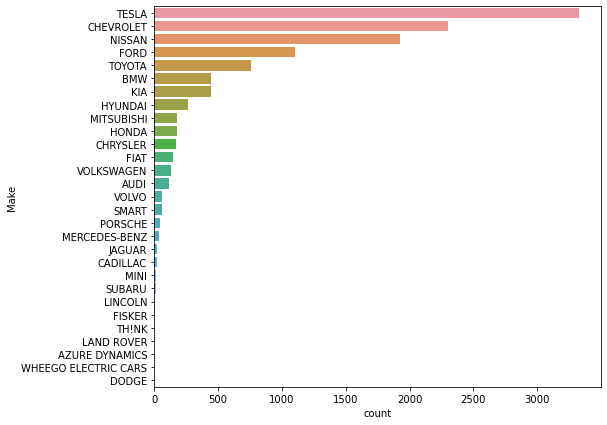

In [14]:
df3 = df.drop(df[(df['North_South']=='North')&(df['West_East']=='West')].index)
fig, ax3 = plt.subplots()
fig.set_size_inches(8, 7)
ax3 = sns.countplot(y = 'Make',data = df3,order = df3['Make'].value_counts().index)

From the above graph the top 10 most used vehicles used in Washington in the most densely populated area are:
1. Tesla
2. Chevrolet
3. Nissan
4. Ford
5. Toyota
6. BMW
7. Kia
8. Hyundai
9. Mitsubishi
10. Honda

#### Research Question #3
**How do the top 5 cars in the most densely populated places in Washington compare in MSRP?**

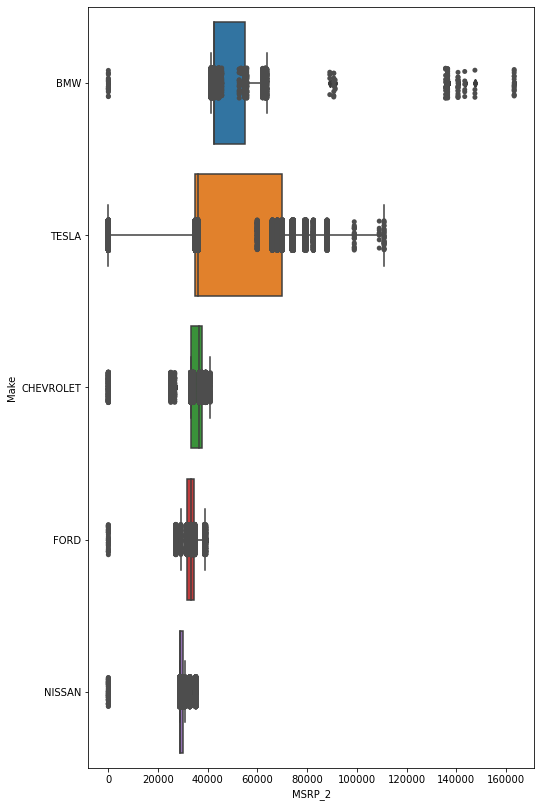

In [15]:
df4 = df.drop(df[(df['Make']!='TESLA')&(df['Make']!='NISSAN')&(df['Make']!='CHEVROLET')&(df['Make']!='FORD')&(df['Make']!='BMW')].index)
df4 = df4.groupby(['Make'])['MSRP'].mean().reset_index()
df4 = df4.sort_values(by='MSRP', ascending=False)
df4 = df4.reset_index(drop=True)
df4 = df4.join(df.set_index('Make'), on='Make', lsuffix='_1', rsuffix='_2')
df4 = df4.sort_values(by='MSRP_1', ascending=False)
fig1, ax2 = plt.subplots()
fig1.set_size_inches(8, 14)
ax3 = sns.boxplot(x="MSRP_2", y="Make", data=df4)
ax3 = sns.stripplot(x="MSRP_2", y="Make", data=df4, color="0.3")

Of the top 5 most used cars in the most densely populated places in Washington, BMW was the most expensive while Nissan was the least expensive. From the barplot, we can see the variations in MSRP between Tesla to be greater compared to the other Electric Vehicle Makes. Nissan had the lowest variation of MSRP compared to the other Electric Vehicles.